Nama: Nisma Fadillah Abdul Rahman Onge

NIM: 225150200111063

Prodi: Teknik Informatika

#The whole process

##Loading the data

Pada tahap ini, saya memasukkan dataset yang telah disediakan kemudian mengubahkan ke dalam bentuk dataframe dengan nama 'df'. Di sini terlihat bahwa terdapat 21 kolom dan 1000 baris dalam dataset.

In [ ]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('dataset_31_credit-g.arff')
df = pd.DataFrame(data)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


Dari tahap sebelumnya, terlihat untuk fitur kategorikal datanya dalam format 'b...'. Hal ini menunjukkan bahwa data tersimpan dalam bentuk byte, bukan string. Oleh karena itu, saya mengubahnya ke dalam bentuk object string dengan kode di bawah ini.

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.decode('utf-8')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


Selanjutnya, saya mengecek apakah terdapat missing value dalam dataset. Ternyata tidak terdapat missing value dalam dataset yang berarti akan mempermudah tahap preprocessing nantinya.

In [ ]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


##Preprocessing categorical features

In [ ]:
cat_features = df.select_dtypes(include=['object']).columns
cat_features = cat_features.drop('class')
cat_features

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object')

Pada tahap ini, saya menganalisis distribusi data untuk fitur kategorikal. Terlihat bahwa banyak kelas dalam data berada di target kelas 'good'. Hal ini menunjukkan adanya imbalance data dalam dataset.

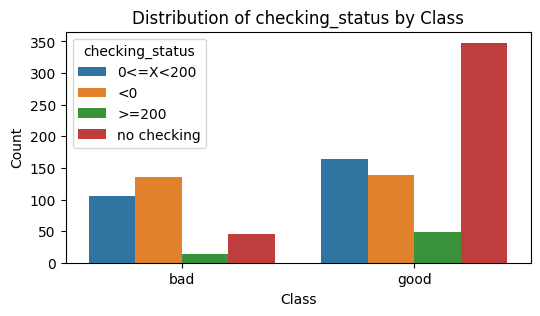

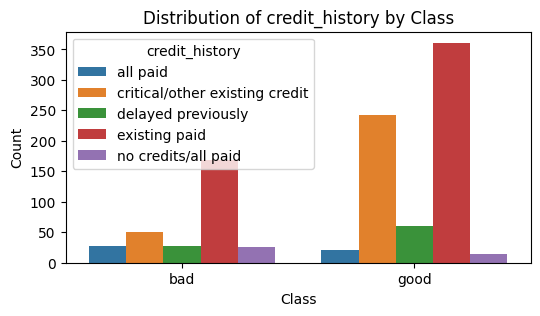

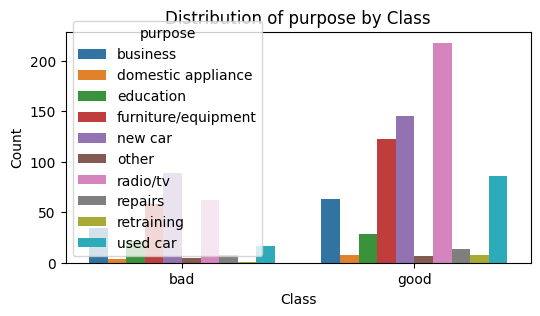

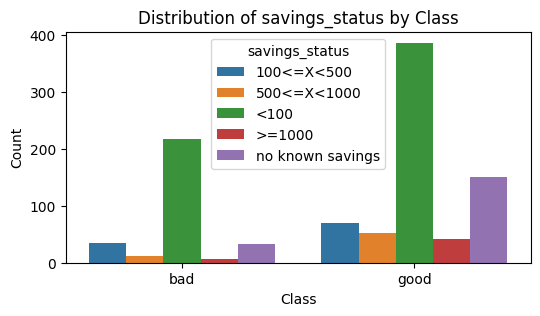

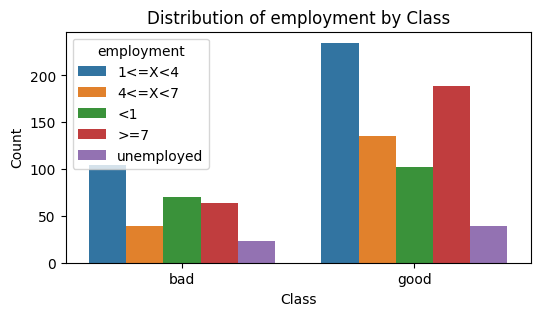

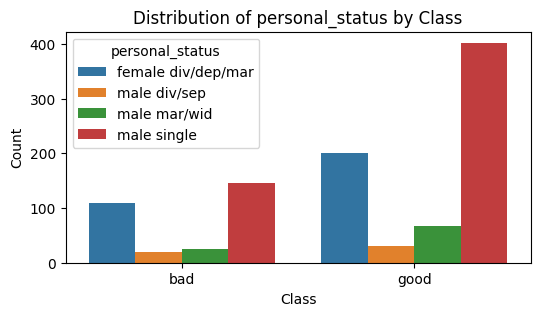

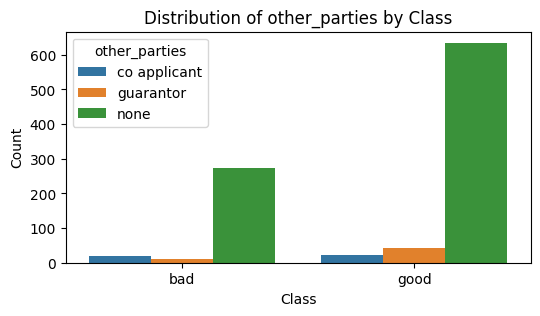

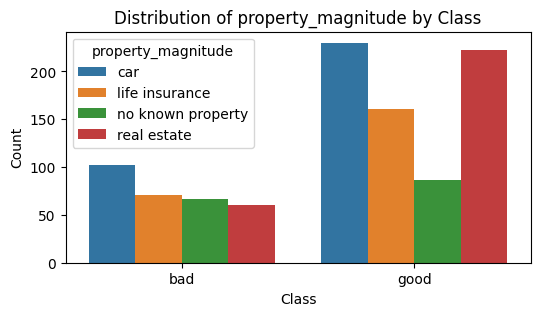

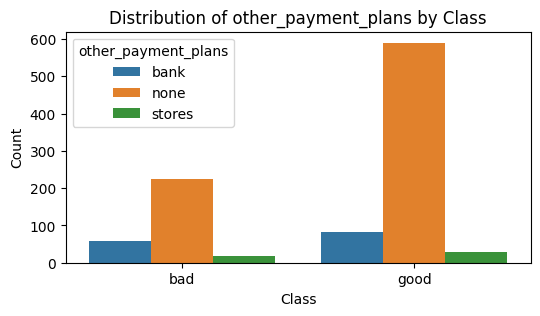

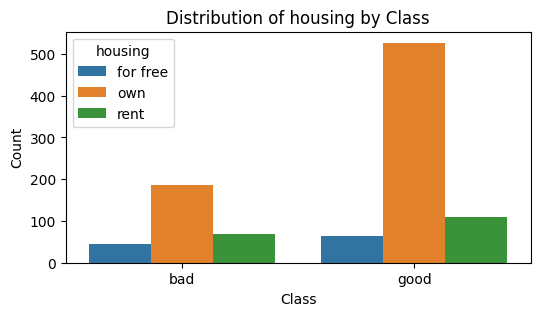

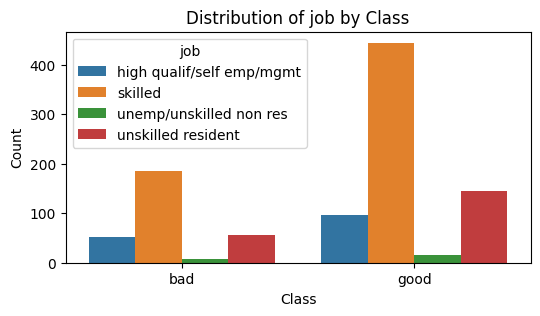

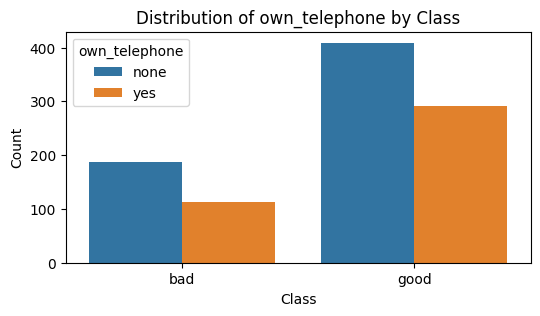

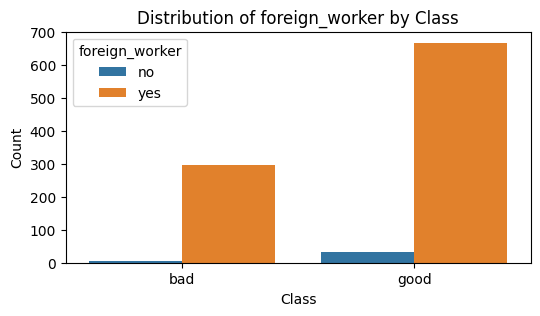

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_features:
  distribution = df.groupby('class')[col].value_counts().unstack().fillna(0)
  distribution = distribution.reset_index()
  melted_df = pd.melt(distribution, id_vars='class', var_name=col, value_name='count')
  plt.figure(figsize=(6, 3))
  sns.barplot(x='class', y='count', hue=col, data=melted_df)
  plt.title(f'Distribution of {col} by Class')
  plt.xlabel('Class')
  plt.ylabel('Count')
  plt.show()

Beberapa fitur kategorikal menggunakan simbol yang menunjukkan rentang di dalamnya ('<' '>'). Simbol ini tidak dapat diproses oleh beberapa model algoritma. Oleh karena itu, saya mengubahnya ke dalam bentuk angka menaik dikarenakan fitur ini menunjukkan adanya tingkatan/urutan (ordinal).

In [ ]:
ordinal = ['checking_status', 'savings_status', 'employment']
for col in ordinal:
  print(col, df[col].unique())

checking_status ['<0' '0<=X<200' 'no checking' '>=200']
savings_status ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']


In [ ]:
checking_status_mapping = {
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
}

savings_status_mapping = {
    'no known savings': 0,
    '<100': 1,
    '100<=X<500': 2,
    '500<=X<1000': 3,
    '>=1000': 4
}

employment_mapping = {
    'unemployed': 0,
    '<1': 1,
    '1<=X<4': 2,
    '4<=X<7': 3,
    '>=7': 4
}

In [ ]:
df['checking_status'] = df['checking_status'].map(checking_status_mapping)
df['savings_status'] = df['savings_status'].map(savings_status_mapping)
df['employment'] = df['employment'].map(employment_mapping)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,critical/other existing credit,radio/tv,1169.0,0,4,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,2,48.0,existing paid,radio/tv,5951.0,1,2,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,0,12.0,critical/other existing credit,education,2096.0,1,3,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,1,42.0,existing paid,furniture/equipment,7882.0,1,3,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,1,24.0,delayed previously,new car,4870.0,1,2,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


##Preprocessing numerical features

In [ ]:
num_features = df.select_dtypes(include=['float64']).columns
num_features

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

Kode di bawah ini digunakan untuk mengetahui deskripsi statistik dari dataset.

In [ ]:
df.describe()

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.001000,20.903000,3271.258000,1.190000,2.384000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.957034,12.058814,2822.736876,0.966869,1.208306,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,1.000000,2.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,1.000000,18.000000,2319.500000,1.000000,2.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,2.000000,24.000000,3972.250000,1.000000,4.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,3.000000,72.000000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Di tahap ini, saya menganalisis distribusi fitur numerikal menggunakan histogram dan boxplot. Terlihat terdapat outlier pada fitur 'credit_amount'. Saya tidak melakukan apa-apa terhadap fitur tersebut karena menurut saya jumlah kredit yang besar masih mungkin dalam skenario di dunia nyata. Namun, tidak dipungkiri outliers akan berpengaruh bagi beberapa model seperti regresi linear.


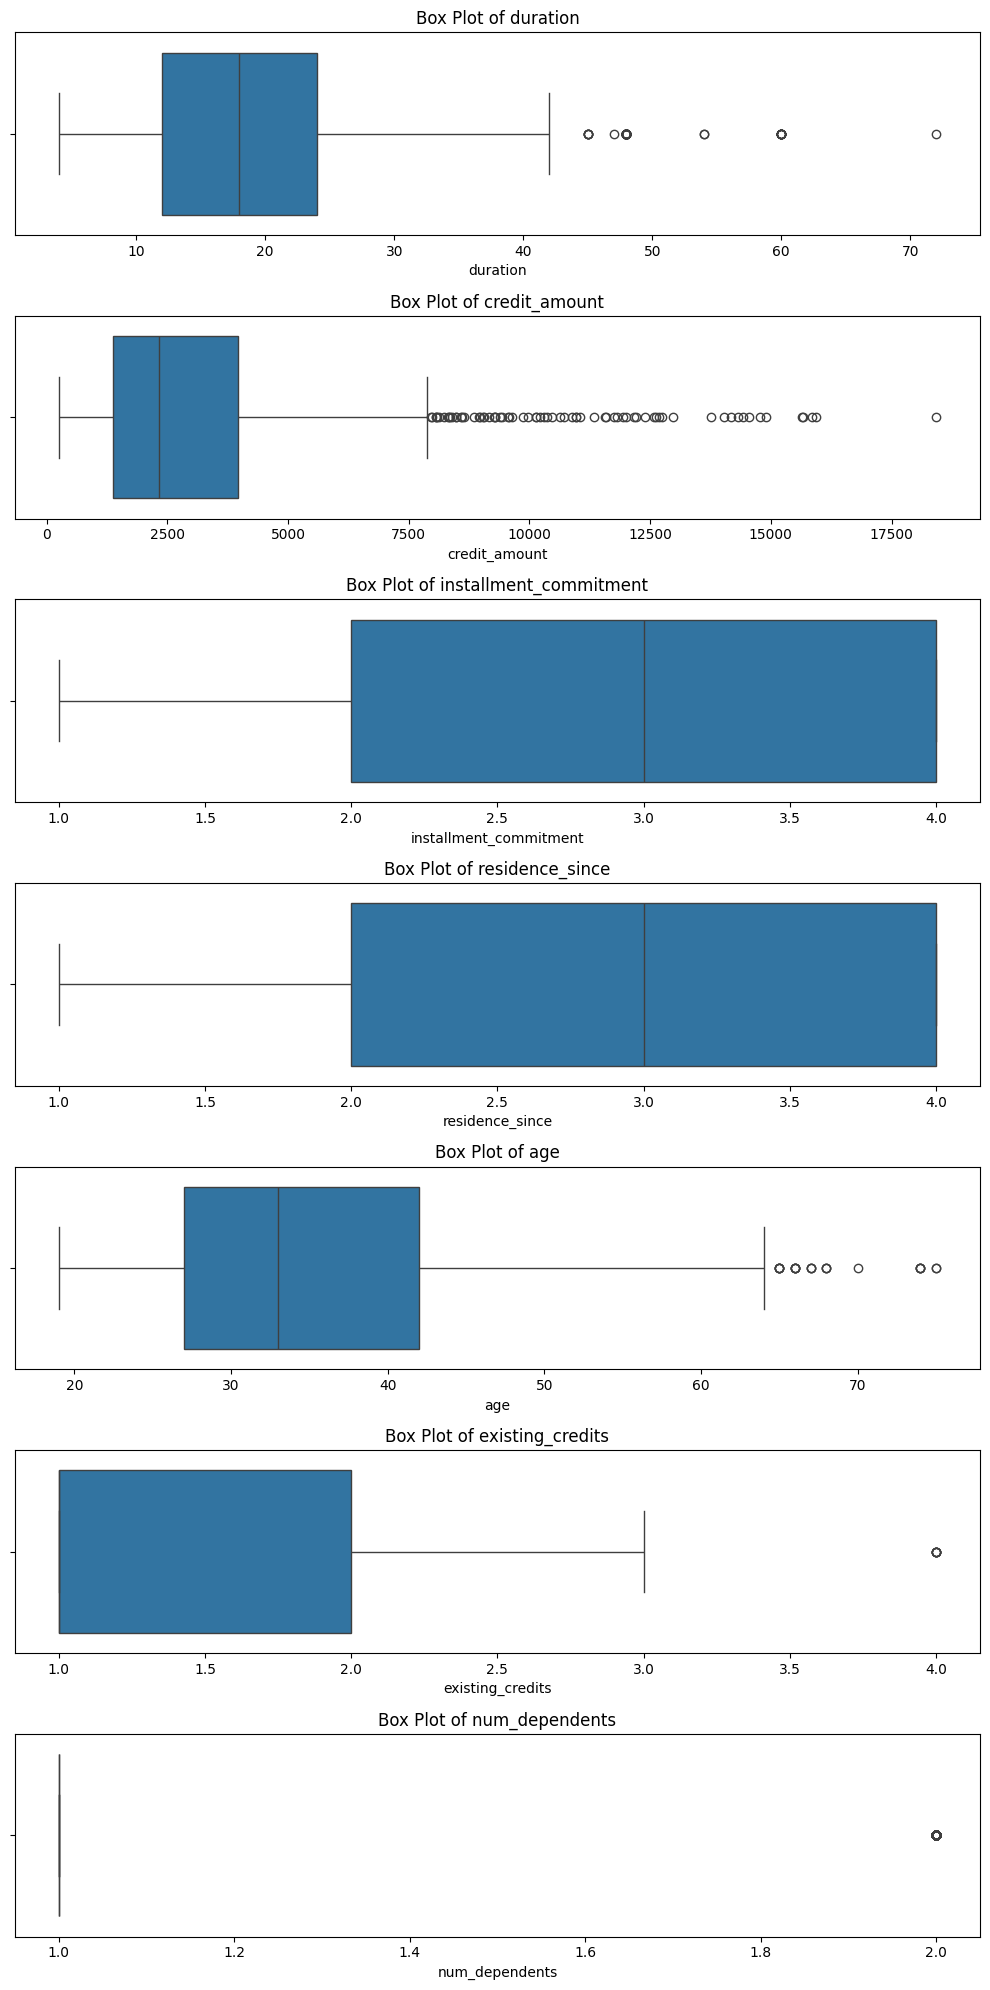

In [ ]:
plt.figure(figsize=(10, 20))

for i, feature in enumerate(num_features):
    plt.subplot(len(num_features), 1, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

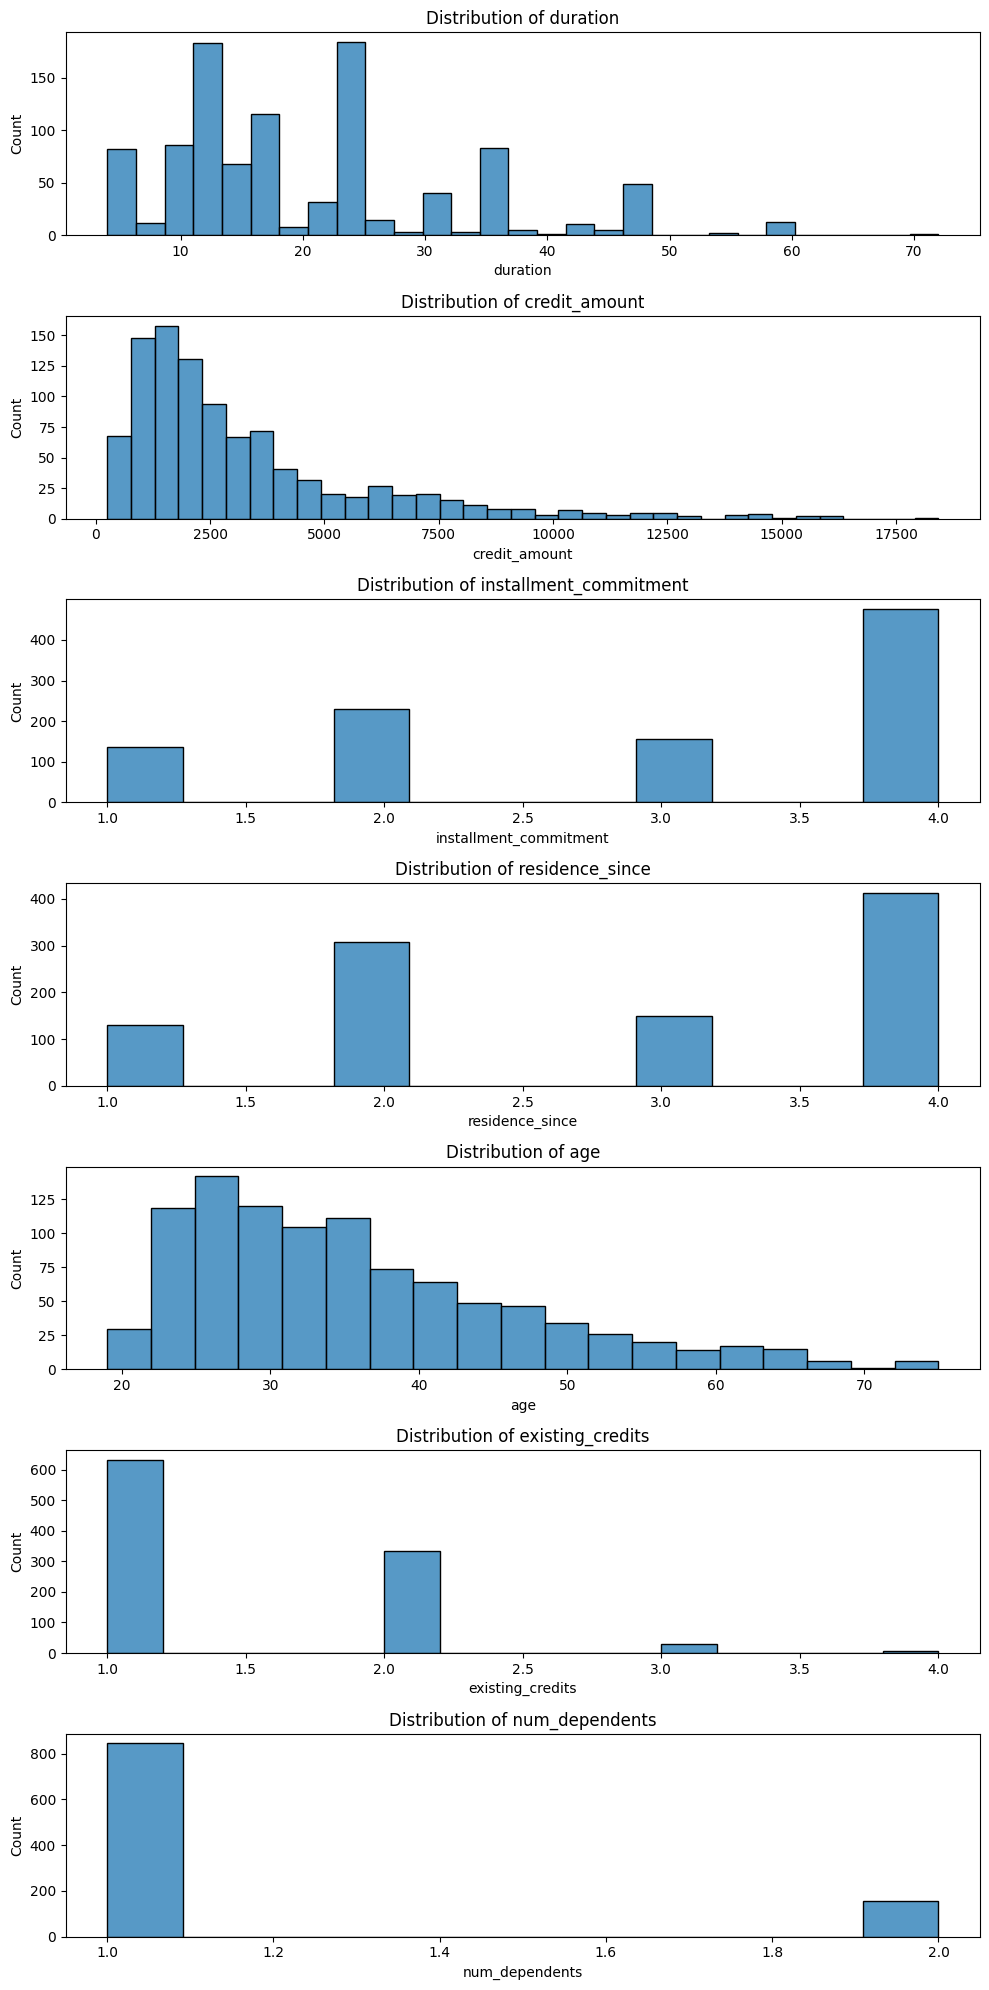

In [ ]:
plt.figure(figsize=(10, 20))

for i, feature in enumerate(num_features):
    plt.subplot(len(num_features), 1, i + 1)
    sns.histplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Saya melakukan binning untuk fitur 'age'. Hal ini dikarenakan binning dapat membantu mengurangi dampak variasi kecil pada fitur 'age'.

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['0', '1', '2', '3', '4', '5']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df.drop('age', axis=1, inplace=True)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,age_group
0,1,6.0,critical/other existing credit,radio/tv,1169.0,0,4,4.0,male single,none,...,real estate,none,own,2.0,skilled,1.0,yes,yes,good,4
1,2,48.0,existing paid,radio/tv,5951.0,1,2,2.0,female div/dep/mar,none,...,real estate,none,own,1.0,skilled,1.0,none,yes,bad,0
2,0,12.0,critical/other existing credit,education,2096.0,1,3,2.0,male single,none,...,real estate,none,own,1.0,unskilled resident,2.0,none,yes,good,2
3,1,42.0,existing paid,furniture/equipment,7882.0,1,3,2.0,male single,guarantor,...,life insurance,none,for free,1.0,skilled,2.0,none,yes,good,2
4,1,24.0,delayed previously,new car,4870.0,1,2,3.0,male single,none,...,no known property,none,for free,2.0,skilled,2.0,none,yes,bad,3


<Axes: xlabel='age_group'>

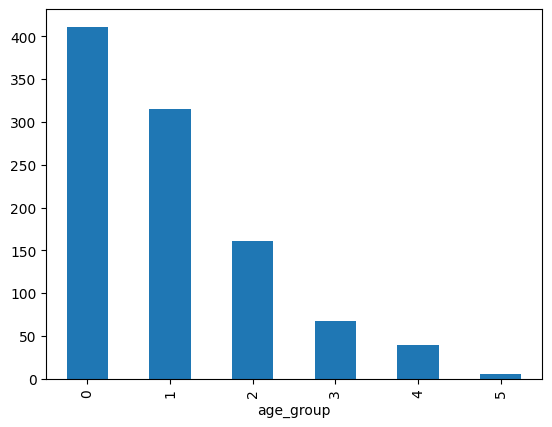

In [ ]:
df['age_group'] = df['age_group'].astype(int)
df['age_group'].value_counts().plot(kind='bar')

##Scaling and one-hot encoding

Setelah tahap preprocessing pada data selesai, saya melakukan normalisasi menggunakan z-score scaling dan one-hot encoding untuk fitur kategorikal.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  other_payment_plans     1000 non-null   object 
 13  housing                 1000 non-null   object 
 14  existing_credits        1000 non-null   f

In [ ]:
categorical = df.select_dtypes(include=['object']).columns
categorical = categorical.drop('class')
df_encoded = pd.get_dummies(df, columns=categorical)
df_encoded.head()

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,existing_credits,num_dependents,class,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,1,6.0,1169.0,0,4,4.0,4.0,2.0,1.0,good,...,True,False,False,True,False,False,False,True,False,True
1,2,48.0,5951.0,1,2,2.0,2.0,1.0,1.0,bad,...,True,False,False,True,False,False,True,False,False,True
2,0,12.0,2096.0,1,3,2.0,3.0,1.0,2.0,good,...,True,False,False,False,False,True,True,False,False,True
3,1,42.0,7882.0,1,3,2.0,4.0,1.0,2.0,good,...,False,False,False,True,False,False,True,False,False,True
4,1,24.0,4870.0,1,2,3.0,4.0,2.0,2.0,bad,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_encoded[numerical] = scaler.fit_transform(df_encoded[numerical])
df_encoded.head()

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,existing_credits,num_dependents,class,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,-0.001045,-1.236478,-0.745131,-1.231393,1.338078,0.918477,1.046987,1.027079,-0.428290,good,...,True,False,False,True,False,False,False,True,False,True
1,1.044372,2.248194,0.949817,-0.196609,-0.317959,-0.870183,-0.765977,-0.704926,-0.428290,bad,...,True,False,False,True,False,False,True,False,False,True
2,-1.046463,-0.738668,-0.416562,-0.196609,0.510060,-0.870183,0.140505,-0.704926,2.334869,good,...,True,False,False,False,False,True,True,False,False,True
3,-0.001045,1.750384,1.634247,-0.196609,0.510060,-0.870183,1.046987,-0.704926,2.334869,good,...,False,False,False,True,False,False,True,False,False,True
4,-0.001045,0.256953,0.566664,-0.196609,-0.317959,0.024147,1.046987,1.027079,2.334869,bad,...,False,False,False,True,False,False,True,False,False,True


##Modelling

Beberapa model tidak dapat memproses jika kelas targetnya dalam bentuk kategorikal. Oleh karena itu, saya menggunakan label encoder untuk mengubah bentuk data dari kelas target yaitu 'class'.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['class'] = label_encoder.fit_transform(df_encoded['class'])
df_encoded.head()

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,existing_credits,num_dependents,class,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,-0.001045,-1.236478,-0.745131,-1.231393,1.338078,0.918477,1.046987,1.027079,-0.428290,1,...,True,False,False,True,False,False,False,True,False,True
1,1.044372,2.248194,0.949817,-0.196609,-0.317959,-0.870183,-0.765977,-0.704926,-0.428290,0,...,True,False,False,True,False,False,True,False,False,True
2,-1.046463,-0.738668,-0.416562,-0.196609,0.510060,-0.870183,0.140505,-0.704926,2.334869,1,...,True,False,False,False,False,True,True,False,False,True
3,-0.001045,1.750384,1.634247,-0.196609,0.510060,-0.870183,1.046987,-0.704926,2.334869,1,...,False,False,False,True,False,False,True,False,False,True
4,-0.001045,0.256953,0.566664,-0.196609,-0.317959,0.024147,1.046987,1.027079,2.334869,0,...,False,False,False,True,False,False,True,False,False,True


Selanjutnya, saya melakukan train test split untuk membagi data 80% untuk training dan 20% untuk testing yang nantinya berguna sebagai bahan evaluasi kinerja model.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Saya menggunakan banyak model sekaligus untuk melihat model mana yang menghasilkan skor terbaik. Model yang menghasilkan skor terbaik nantinya akan dilakukan tuning dan evaluasi lebih lanjut.

Metrik evaluasi yang digunakan nantinya adalah skor akurasi dan skor f1. Gabungan kedua metrik evaluasi ini akan membantu saya dalam menganalisis kinerja model dengan lebih komprehensif.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Dari hasil metrik evaluasi, terlihat bahwa model LightGBM mendapatkan hasil yang terbaik.

In [ ]:
for name, metrics in results.items():
  print(f"{name}:")
  for metric, value in metrics.items():
    print(f"  {metric}: {value}")
  print()

Logistic Regression:
  Accuracy: 0.73
  F1 Score: 0.7061201501877347

Decision Tree:
  Accuracy: 0.725
  F1 Score: 0.7196592786558185

Random Forest:
  Accuracy: 0.78
  F1 Score: 0.758198757763975

XGBoost:
  Accuracy: 0.77
  F1 Score: 0.7616750096264923

LightGBM:
  Accuracy: 0.805
  F1 Score: 0.7986370450703327

CatBoost:
  Accuracy: 0.81
  F1 Score: 0.796903635626436

Gradient Boosting:
  Accuracy: 0.775
  F1 Score: 0.7584413595998776

Support Vector Machine:
  Accuracy: 0.76
  F1 Score: 0.7275781365723597

K-Nearest Neighbors:
  Accuracy: 0.75
  F1 Score: 0.7304002192982456



Untuk meningkatkan hasil prediksi, saya melakukan hyperparameter tuning model lightGBM menggunakan RandomizedSearchCV.

In [ ]:
from scipy.stats import randint, uniform
param_dist = {
    'num_leaves': randint(20, 100),
    'max_depth': randint(5, 50),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

model = lgb.LGBMClassifier()

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Number of random samples
    cv=5,        # Number of cross-validation folds
    scoring='f1',  # Evaluation metric
    random_state=42,
    n_jobs=-1    # Use all available cores
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Dari hyperparameter tuning yang dilakukan, metrik evaluasi f1-score meningkat. Hal ini berarti parameter yang digunakan pada model telah optimal.

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("precision score:", precision_score(y_test, y_pred, average='binary'))
print("recall score:", recall_score(y_test, y_pred, average='binary'))
print("f1-score:", f1_score(y_test, y_pred, average='binary'))
print("accuracy score:", accuracy_score(y_test, y_pred))

precision score: 0.808641975308642
recall score: 0.9290780141843972
f1-score: 0.8646864686468646
accuracy score: 0.795


Selanjutnya, saya menampilkan confusion matrix dari hasil preduksi yang didapatkan. Terlihat bahwa model sudah dapat memprediksi data dengan cukup baik yaitu 159 dari 200 data diprediksi dengan benar.

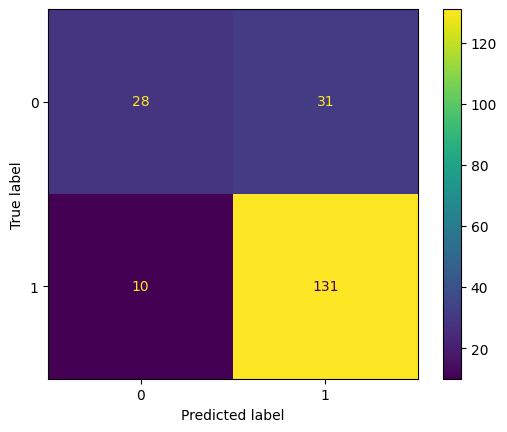

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

Saya sudah melakukan banyak percobaan untuk mendapatkan hasil prediksi dan kinerja model yang baik. Bisa dilihat dalam kode "Trial and Error" di bawah ini.

Saya mencoba melakukan modelling tanpa pre-processing dan hanya menggunakan one-hot encoding serta scaler saja. Namun, hasil yang didapatkan masih kurang optimal.

  Accuracy: 0.82,
  F1 Score: 0.8159373040752351

Saya juga melakukan undersampling dan oversampling karena terdapat imbalance pada data. Namun, hasil yang didapatkan tidak jauh berbeda dengan model yang menggunakan dataset tanpa di oversampling maupun undersampling.

f1-score: 0.8571428571428571,
accuracy score: 0.79


Artinya, model yang digunakan yaitu 'LightGBM' dapat melakukan prediksi yang optimal meskipun terdapat imbalance data dalam dataset.

#Trial and error

##Modelling w/ oversampling and undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

print("Class distribution ", pd.Series(y_train).value_counts())

Class distribution  class
1    559
0    241
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution resampled", pd.Series(y_resampled).value_counts())

Class distribution resampled class
0    559
1    559
Name: count, dtype: int64


In [ ]:
from scipy.stats import randint, uniform
param_dist = {
    'num_leaves': randint(20, 100),
    'max_depth': randint(5, 50),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

model = lgb.LGBMClassifier()

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_resampled, y_resampled)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 559, number of negative: 559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 1118, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("precision score:", precision_score(y_test, y_pred, average='binary'))
print("recall score:", recall_score(y_test, y_pred, average='binary'))
print("f1-score:", f1_score(y_test, y_pred, average='binary'))
print("accuracy score:", accuracy_score(y_test, y_pred))

precision score: 0.8235294117647058
recall score: 0.8936170212765957
f1-score: 0.8571428571428571
accuracy score: 0.79


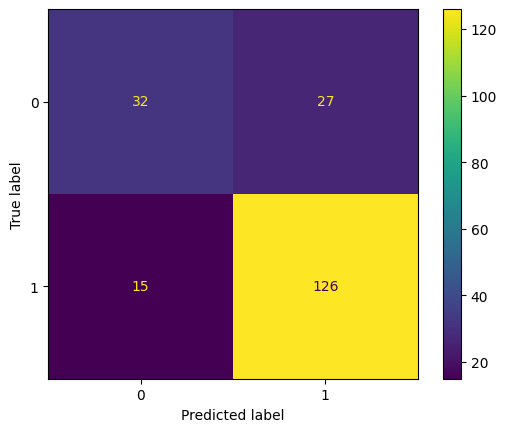

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

##Modelling w/ no preprocessing

In [ ]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('dataset_31_credit-g.arff')
df = pd.DataFrame(data)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.decode('utf-8')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df.describe(include=[object])

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


In [ ]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [ ]:
cat_features = df.select_dtypes(include=['object']).columns
cat_features = cat_features.drop('class')
cat_features

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df, columns=cat_features)

label_encoder = LabelEncoder()
df_encoded['class'] = label_encoder.fit_transform(df_encoded['class'])
df_encoded.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0<=X<200,checking_status_<0,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,False,True,...,True,False,False,True,False,False,False,True,False,True
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,True,False,...,True,False,False,True,False,False,True,False,False,True
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1,False,False,...,True,False,False,False,False,True,True,False,False,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,False,True,...,False,False,False,True,False,False,True,False,False,True
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0,False,True,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
for name, metrics in results.items():
  print(f"{name}:")
  for metric, value in metrics.items():
    print(f"  {metric}: {value}")
  print()

Logistic Regression:
  Accuracy: 0.775
  F1 Score: 0.7676581289273069

Decision Tree:
  Accuracy: 0.675
  F1 Score: 0.6786724780605208

Random Forest:
  Accuracy: 0.8
  F1 Score: 0.7862143532909853

LightGBM:
  Accuracy: 0.82
  F1 Score: 0.8159373040752351

CatBoost:
  Accuracy: 0.815
  F1 Score: 0.8030863451793684

Gradient Boosting:
  Accuracy: 0.785
  F1 Score: 0.7747739531234678

Support Vector Machine:
  Accuracy: 0.715
  F1 Score: 0.6138519146531016

K-Nearest Neighbors:
  Accuracy: 0.68
  F1 Score: 0.6482891022021456

